# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
data = pd.read_csv("power plant.csv")

In [4]:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [5]:
data.shape

(9568, 5)

In [6]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# Define X and Y

In [9]:
x = data.drop(["PE"],axis = 1).values
y = data["PE"].values

In [10]:
print(x)

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]


In [11]:
print(y)

[480.48 445.75 438.76 ... 465.96 450.93 451.67]


# Splitting the dataset into training and test set.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

# Fit the Multiple Linear Regression model to the training dataset

In [15]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

LinearRegression()

# Predicting the Test dataset

In [17]:
y_pred = regressor.predict(x_test)
print(y_pred)

[433.33259502 448.37969342 445.91247797 ... 444.05809103 459.34745691
 472.91532015]


In [48]:
regressor.predict([[8.3,40.77,1010.84,90.01]])

array([477.20338373])

# Evaluate the Model

In [18]:
#r2 score
from sklearn.metrics import mean_squared_error, r2_score
r_value = r2_score(y_test, y_pred)
print("r2_score : ", r_value)

r2_score :  0.9289374661293962


# Plot the results

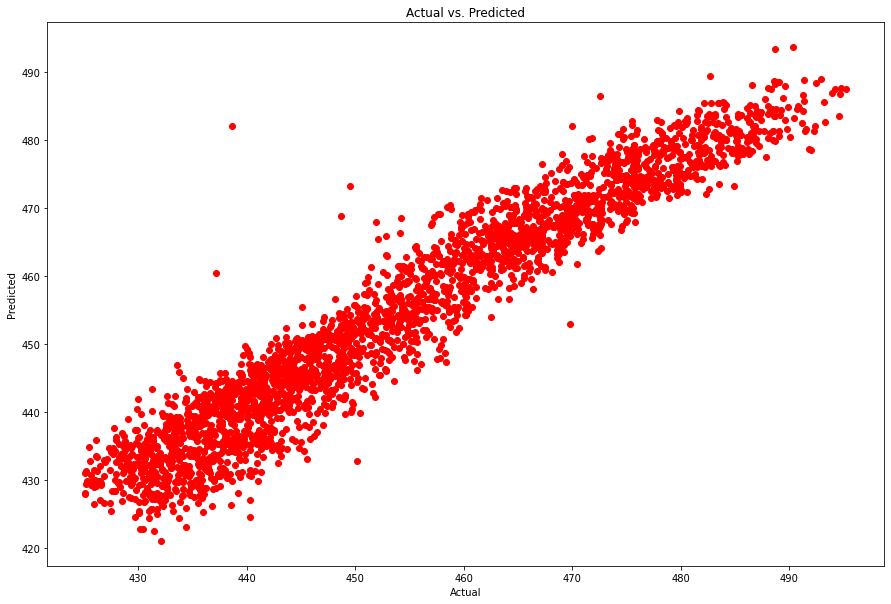

In [19]:
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred,color = 'red')
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Predicted values

In [20]:
pred_y = pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
pred_y[0:20]

,Actual Value,Predicted Value,Difference
0,426.18,433.332595,-7.152595
1,451.10,448.379693,2.720307
2,442.87,445.912478,-3.042478
3,443.70,445.986055,-2.286055
4,460.59,462.822292,-2.232292
5,438.00,440.810771,-2.810771
6,484.31,482.716625,1.593375
7,464.18,462.222261,1.957739
8,452.53,451.261034,1.268966
9,445.54,445.431174,0.108826
